In [1]:
import torch
from PIL import Image
from diffsynth.pipelines.qwen_image import QwenImagePipeline, ModelConfig

pipe = QwenImagePipeline.from_pretrained(
    torch_dtype=torch.bfloat16,
    device="cuda",
    model_configs=[
        ModelConfig(model_id="Qwen/Qwen-Image-Edit-2509", origin_file_pattern="transformer/diffusion_pytorch_model*.safetensors"),
        ModelConfig(model_id="Qwen/Qwen-Image", origin_file_pattern="text_encoder/model*.safetensors"),
        ModelConfig(model_id="Qwen/Qwen-Image", origin_file_pattern="vae/diffusion_pytorch_model.safetensors"),
    ],
    tokenizer_config=None,
    processor_config=ModelConfig(model_id="Qwen/Qwen-Image-Edit", origin_file_pattern="processor/"),
)



/data/student/s2430069/.local/share/mamba/envs/diffy/lib/python3.13/site-packages/torch/cuda/__init__.py:63: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]


Loading models from: ['./models/Qwen/Qwen-Image-Edit-2509/transformer/diffusion_pytorch_model-00005-of-00005.safetensors', './models/Qwen/Qwen-Image-Edit-2509/transformer/diffusion_pytorch_model-00002-of-00005.safetensors', './models/Qwen/Qwen-Image-Edit-2509/transformer/diffusion_pytorch_model-00004-of-00005.safetensors', './models/Qwen/Qwen-Image-Edit-2509/transformer/diffusion_pytorch_model-00003-of-00005.safetensors', './models/Qwen/Qwen-Image-Edit-2509/transformer/diffusion_pytorch_model-00001-of-00005.safetensors']
    model_name: qwen_image_dit model_class: QwenImageDiT
    The following models are loaded: ['qwen_image_dit'].
Loading models from: ['./models/Qwen/Qwen-Image/text_encoder/model-00002-of-00004.safetensors', './models/Qwen/Qwen-Image/text_encoder/model-00003-of-00004.safetensors', './models/Qwen/Qwen-Image/text_encoder/model-00004-of-00004.safetensors', './models/Qwen/Qwen-Image/text_encoder/model-00001-of-00004.safetensors']
    model_name: qwen_image_text_encoder m

In [2]:
pipe.load_lora(pipe.dit, "train/Qwen-Image-Edit-2509_inpaint_lora/step-3000.safetensors")



720 tensors are updated by LoRA.


In [3]:
import json
dataset = json.load(open("prepared_data_original/metadata.json"))

In [26]:
dataset[0]

{'id': '000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807',
 'ref_file': 'ref/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807.png',
 'ref_mask_file': None,
 'ref_mask_type': None,
 'tgt_clean_file': '000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807.png',
 'tgt_original_file': 'tgt_original/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807.png',
 'tgt_original_mask_file': 'tgt_original/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807_mask.png',
 'blockwise_controlnet_image': 'tgt_original/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807.png',
 'blockwise_controlnet_inpaint_mask': 'tgt_original/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807_mask.png',
 'edit_image': ['tgt_original/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807.png',
  'ref/000543f6b0ba609b88c9197e114194fda1a652cb4f91884835714895afb07807.png'],
 'image': 'tgt_clean/000543f6b0ba609b88c9197e1141

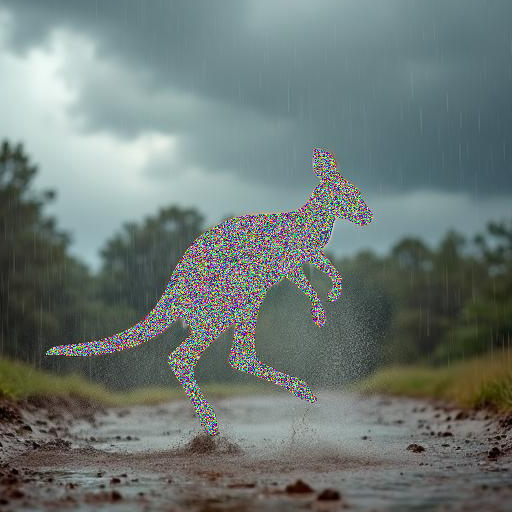

In [ ]:
import random
import PIL.Image as Image
data = random.choice(dataset)
prompt = data["prompt"]
base_path = "prepared_data_original/"
edit_images = [Image.open(base_path + p) for p in data["edit_image"]]
gt = Image.open(base_path + data["image"])
edit_images[1]

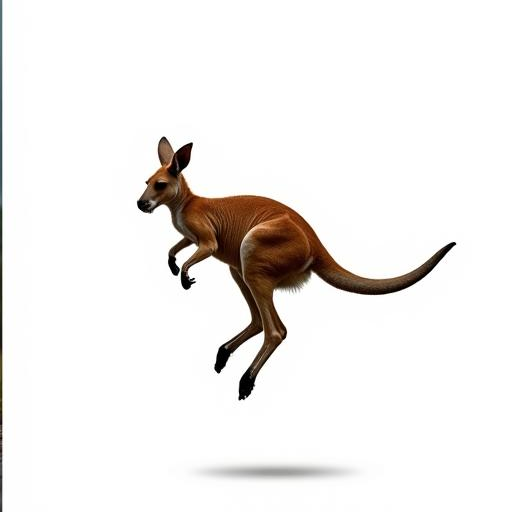

In [57]:
edit_images[1]

In [55]:
org = Image.open(base_path+data['image'])

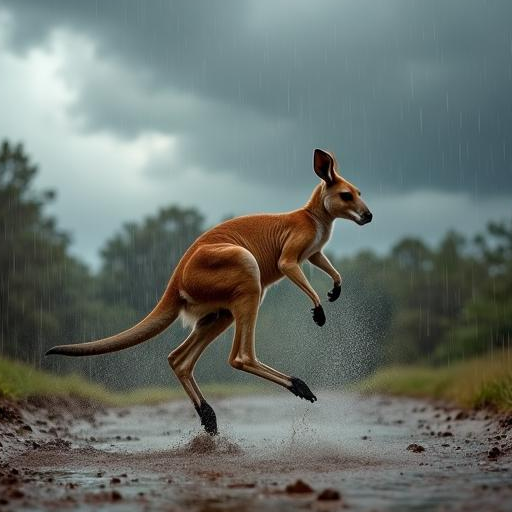

In [56]:
org

In [51]:
image = pipe(prompt, edit_image=edit_images, seed=0, num_inference_steps=50, height=512, width=512)
image.save("image_test1.jpg")

100%|██████████| 50/50 [02:12<00:00,  2.66s/it]


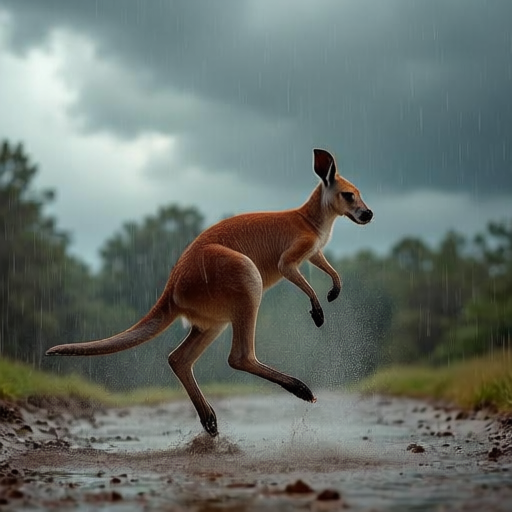

In [52]:
image